
# Setup



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("spotify_data/dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# Data Cleaning


*   Todo 1
*   Todo 2



In [3]:
#spotify_original_reshape.head(20)
#spotify_original.shape
spotify_original_reshape




,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
spotify_original_reshape['track_name'].describe()

count              113999
unique              73608
top       Run Rudolph Run
freq                  151
Name: track_name, dtype: object

In [5]:
spotify_original_reshape['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [6]:
spotify_original_reshape['track_genre'].describe()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object

In [7]:
missing_track = spotify_original_reshape[spotify_original_reshape['track_id'] == '1kR4gIb7nGxHPI3D2ifs59']
print(missing_track)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


In [8]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

(114000, 20)
(113999, 20)


In [9]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final


Shape of the dataset before cleaning: (113999, 23)
Shape of the dataset after cleaning: (81206, 23)
Shape of the dataset after removing extra columns: (81206, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


# Exploratory Data Analysis




In [ ]:
"""
Histograms
"""
spotify_original_reshape['liveness'].hist(bins = 30, alpha = 0.5, color='blue')

In [ ]:
"""
Visualizing correlation between dancebility and popularity features
"""

plt.scatter(spotify_original_reshape['danceability'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')

In [ ]:
"""
Visualizing correlation between energy and popularity
"""

plt.scatter(spotify_original_reshape['energy'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity')

In [ ]:
"""
Visualizing the Correlation Between Popularity and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Popularity Correlation:', np.corrcoef(spotify_original_reshape['popularity'], spotify_original_reshape[features])[0,1])


In [ ]:
"""
Visualizing the Correlation Between Tempo and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Tempo Correlation:', np.corrcoef(spotify_original_reshape['tempo'], spotify_original_reshape[features])[0,1])


In [ ]:
"""
Correlation matrix and Heatmap
"""

numeric_data = spotify_cleaned_final.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

danceability_correlation = correlation_matrix["danceability"].sort_values(ascending=False)

print(danceability_correlation)

import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Spotify Dataset')
plt.show()

# 3. Regression

## 3a. Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

ls_tempo_danceability_fit = LinearRegression()
ls_tempo_danceability_fit.fit(X=np.array(spotify_original_reshape_drop['tempo']).reshape(-1, 1),
                          y=spotify_original_reshape_drop['danceability'])

In [ ]:
fig = px.scatter(spotify_original_reshape_drop, x='tempo', y='danceability')
fig.add_trace(
    go.Scatter(x=spotify_original_reshape_drop['tempo'],
                y=ls_tempo_danceability_fit.intercept_ + spotify_original_reshape_drop['tempo'] * ls_tempo_danceability_fit.coef_[0],
                mode='lines',
                name='LS',
                line={'dash': 'solid',
                      'color': 'black'})
)

In [ ]:
pred_train_df = pd.DataFrame(
    {'true': spotify_original_reshape_drop['danceability'],
     'ls_pred': ls_tempo_danceability_fit.predict(np.array(spotify_original_reshape_drop['tempo']).reshape(-1, 1))})
pred_train_df

In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

In [ ]:
ls_loudness_energy_fit = LinearRegression()
ls_loudness_energy_fit.fit(X=np.array(spotify_original_reshape_drop['loudness']).reshape(-1, 1),
                          y=spotify_original_reshape_drop['energy'])

fig = px.scatter(spotify_original_reshape_drop, x='loudness', y='energy')
fig.add_trace(
    go.Scatter(x=spotify_original_reshape_drop['loudness'],
                y=ls_loudness_energy_fit.intercept_ + spotify_original_reshape_drop['loudness'] * ls_loudness_energy_fit.coef_[0],
                mode='lines',
                name='LS',
                line={'dash': 'solid',
                      'color': 'black'})
)

In [ ]:
pred_train_df = pd.DataFrame(
    {'true': spotify_original_reshape_drop['energy'],
     'ls_pred': ls_loudness_energy_fit.predict(np.array(spotify_original_reshape_drop['loudness']).reshape(-1, 1))})
pred_train_df

In [ ]:
# calculate the rMSE, MAE, MAD, correlation, and R2 of the true price with the LS predictions
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))

## 3b. Polynomial Regression

Coefficients (Theta): [ 0.00000000e+00 -2.59675623e-04  4.24960612e-08 -1.88984444e-01
  3.41176007e-04  2.64481489e-02 -7.78461427e-03  2.54346628e-01
 -3.20787626e-01  1.02953313e-01  1.38970271e-01  1.52125834e-01
  2.50173578e-04  1.38869353e-02]
Columns Index(['popularity', 'duration_ms', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
Mean Squared Error (Validation Data): 0.016098743090939494
R-squared (Validation Data): 0.759157735379239
Mean Squared Error (Test Data): 0.015587638334681006
R-squared (Test Data): 0.7669009648753816
X_train shape: (27068, 13)
X_val shape: (27069, 13)
X_test shape: (27069, 13)
y_train shape: (27068,)
y_val shape: (27069,)
y_test shape: (27069,)


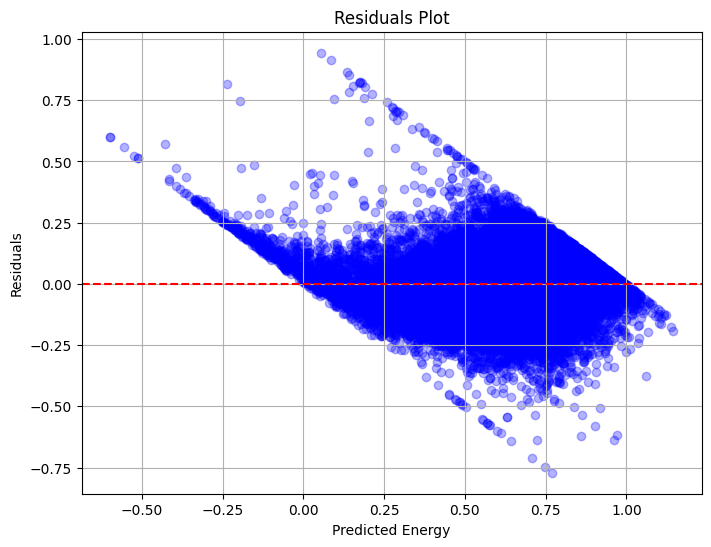

In [10]:
"""
Polynomial Regression with y = Energy; x = Loudness and degree = 1
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Lasso


X_loudness = spotify_cleaned_final.select_dtypes(include=['float64', 'int64']).drop(columns=['energy'])
y_energy = spotify_cleaned_final['energy']


X_train_val, X_test, y_train_val, y_test = train_test_split(X_loudness, y_energy, test_size=1/3, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=35)

# polynomial transformation to the features (degree=1)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# train the linear regression model using the transformed polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

print("Coefficients (Theta):", model.coef_)

print("Columns", X_loudness.columns)

# evaluate on validation set
y_pred_val = model.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Mean Squared Error (Validation Data): {mse_val}")
print(f"R-squared (Validation Data): {r2_val}")

# once validated, evaluate on the test set (unseen data)
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R-squared (Test Data): {r2_test}")

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

import matplotlib.pyplot as plt

# Calculate residuals for the test set
residuals = y_test - y_pred_test

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Energy')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [ ]:
"""
Polynomial Regression with y = Energy; x = Loudness and degree=2
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_loudness = numeric_data[['loudness']]
y_energy = numeric_data['energy']



X_train_val, X_test, y_train_val, y_test = train_test_split(X_loudness, y_energy, test_size=1/3, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=35)

# polynomial transformation to the features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# train the linear regression model using the transformed polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# evaluate on validation set
y_pred_val = model.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Mean Squared Error (Validation Data): {mse_val}")
print(f"R-squared (Validation Data): {r2_val}")

# once validated, evaluate on the test set (unseen data)
y_pred_test = model.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R-squared (Test Data): {r2_test}")

# plot the validation data points and regression line
plt.scatter(X_val, y_val, color='green', label='Validation Data points', s=10, alpha=0.3)
sorted_idx = np.argsort(X_val.values.flatten())
plt.plot(X_val.values[sorted_idx], y_pred_val[sorted_idx], color='orange', linewidth=2, label='Polynomial regression line (Validation)')

plt.xticks(np.arange(min(X_val.values), max(X_val.values)+1, 2), rotation=45, fontsize=10)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel('Loudness')
plt.ylabel('Energy (scale 0-1)')
plt.title('Energy vs Loudness with Polynomial Regression Line (Validation Data)')
plt.legend()
plt.grid(True)
plt.show()

# plot the test data points and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data points', s=10, alpha=0.3)
sorted_idx = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_idx], y_pred_test[sorted_idx], color='red', linewidth=2, label='Polynomial regression line (Test)')

plt.xticks(np.arange(min(X_test.values), max(X_test.values)+1, 2), rotation=45, fontsize=10)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel('Loudness')
plt.ylabel('Energy (scale 0-1)')
plt.title('Energy vs Loudness with Polynomial Regression Line (Test Data)')
plt.legend()
plt.grid(True)
plt.show()

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


## 3c. Regularization

In [ ]:
"""
Polynomial Regression with Regularization using Lasso Regression
"""

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Polynomial transformation (you've already done this)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 2: Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=0.005)  # You can tune the alpha value
lasso_model.fit(X_train_poly, y_train)

# Step 3: Predict on validation and test sets
y_pred_val_lasso = lasso_model.predict(X_val_poly)
y_pred_test_lasso = lasso_model.predict(X_test_poly)

# Step 4: Evaluate the model performance
mse_val_lasso = mean_squared_error(y_val, y_pred_val_lasso)
r2_val_lasso = r2_score(y_val, y_pred_val_lasso)
print(f"Lasso - Mean Squared Error (Validation Data): {mse_val_lasso}")
print(f"Lasso - R-squared (Validation Data): {r2_val_lasso}")

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f"Lasso - Mean Squared Error (Test Data): {mse_test_lasso}")
print(f"Lasso - R-squared (Test Data): {r2_test_lasso}")

# Step 5: Analyze residuals for Lasso model
residuals_lasso = y_test - y_pred_test_lasso

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test_lasso, residuals_lasso, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Energy (Lasso)')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Lasso Regression')
plt.grid(True)
plt.show()


In [ ]:
"""
Polynomial Regression with multiple features; Regularization (Ridge)
"""

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select additional features along with loudness
X_features = numeric_data[['loudness', 'tempo', 'valence', 'danceability']]  # Add relevant features
y_energy = numeric_data['energy']

# Step 2: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_features, y_energy, test_size=1/3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Step 3: Apply polynomial transformation (degree=2 or 3) on multiple features
poly = PolynomialFeatures(degree=2)  # You can change to degree 3 if needed
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Step 4: Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train_poly, y_train)

# Step 5: Predict on validation and test sets
y_pred_val_ridge = ridge_model.predict(X_val_poly)
y_pred_test_ridge = ridge_model.predict(X_test_poly)

# Step 6: Evaluate the model performance
mse_val_ridge = mean_squared_error(y_val, y_pred_val_ridge)
r2_val_ridge = r2_score(y_val, y_pred_val_ridge)
print(f"Ridge - Mean Squared Error (Validation Data): {mse_val_ridge}")
print(f"Ridge - R-squared (Validation Data): {r2_val_ridge}")

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f"Ridge - Mean Squared Error (Test Data): {mse_test_ridge}")
print(f"Ridge - R-squared (Test Data): {r2_test_ridge}")

# Step 7: Plot the residuals for Ridge regression on the test set
residuals_ridge = y_test - y_pred_test_ridge
plt.scatter(X_test['loudness'], residuals_ridge)  # Scatter plot against loudness
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Loudness')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Ridge Regression with Additional Features')
plt.show()
